In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from ntpath import join
from statistics import mean, median, variance
from scipy.signal import find_peaks
import sklearn as sk
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import os

In [2]:
#set source kinect/python
source='kinect'
#kinect
names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','ZF006_b_data','ZF007_b_data','ZM008_b_data','ZM009_b_data','ZF010_b_data','ZF011_b_data','ZM012_b_data','ZM013_b_data','ZM014_b_data','ZM015_b_data','ZM016_b_data','ZM017_b_data','ZF018_b_data','ZF019_b_data','ZF020_b_data','SM001_bal_data','SM003_bal_data','SM004_bal_data','SM004_bal_data','SM005_bal_data','SM008_bal_data', 'SM009_bal_data','SM012_bal_data','SF013_bal_data','SF014_bal_data','SF015_bal_data','SF016_bal_data','SF017_bal_data','SM030_bal_data','SF031_bal_data','SF031_bal_data','SM032_bal_data','SM033_bal_data','SM034_bal_data','SM035_bal_data']
#names=['ZM001_b_data','ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','ZF006_b_data','ZF007_b_data','ZM008_b_data','ZM009_b_data','ZF010_b_data','ZF011_b_data','ZM012_b_data','ZM013_b_data','ZM014_b_data','ZM015_b_data','ZM016_b_data','ZM017_b_data','ZF018_b_data','ZF019_b_data','ZF020_b_data','SF006_bar_data','SF007_bar_data','SF010_bar_data','SF011_bar_data','SM020_bar_data','SM021_bar_data','SM022_bar_data','SM023_bar_data', 'SM024_bar_data','SM040_bar_data','SM041_bar_data','SF042_bar_data','SF043_bar_data','SF044_bar_data','SF045_bar_data','SF046_bar_data','SM047_bar_data','SM048_bar_data','SM049_bar_data']

print(len(names))
#klasifikace python
#names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','SM001_bal_data','SM002_bal_data','SM003_bal_data','SM004_bal_data','SM005_bal_data']
#names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','SM006_bar_data','SM008_bar_data','SM009_bar_data','SM010_bar_data']
path = r'C:\Users\kuba8\Desktop\studium\Python_record\python_data\Only_selected'
#names = os.listdir(path)
#names=['SF035_bal_data.txt', 'SF036_bal_data.txt', 'SF037_bal_data.txt', 'SF038_bal_data.txt', 'SF039_bal_data.txt', 'SF040_bal_data.txt', 'SM001_bal_data.txt', 'SM002_bal_data.txt', 'SM003_bal_data.txt', 'SM004_bal_data.txt', 'SM005_bal_data.txt', 'SM030_bal_data.txt', 'SM031_bal_data.txt', 'SM032_bal_data.txt', 'SM033_bal_data.txt', 'SM034_bal_data.txt', 'SM041_bal_data.txt', 'SM042_bal_data.txt', 'SM043_bal_data.txt', 'SM044_bal_data.txt', 'ZF011_b_data.txt', 'ZF012_b_data.txt', 'ZF013_b_data.txt', 'ZF014_b_data.txt', 'ZF015_b_data.txt', 'ZF020_b_data.txt', 'ZM001_b_data.txt', 'ZM002_b_data.txt', 'ZM003_b_data.txt', 'ZM004_b_data.txt', 'ZM005_b_data.txt', 'ZM006_b_data.txt', 'ZM007_b_data.txt', 'ZM008_b_data.txt', 'ZM009_b_data.txt', 'ZM010_b_data.txt', 'ZM016_b_data.txt', 'ZM017_b_data.txt', 'ZM018_b_data.txt']
#names=['SF011_bar_data.txt', 'SF012_bar_data.txt', 'SF013_bar_data.txt', 'SF014_bar_data.txt', 'SF015_bar_data.txt', 'SF025_bar_data.txt', 'SM006_bar_data.txt', 'SM007_bar_data.txt', 'SM008_bar_data.txt', 'SM009_bar_data.txt', 'SM010_bar_data.txt', 'SM016_bar_data.txt', 'SM017_bar_data.txt', 'SM018_bar_data.txt', 'SM019_bar_data.txt', 'SM020_bar_data.txt', 'SM021_bar_data.txt', 'SM022_bar_data.txt', 'SM023_bar_data.txt', 'SM024_bar_data.txt', 'ZF011_b_data.txt', 'ZF012_b_data.txt', 'ZF013_b_data.txt', 'ZF014_b_data.txt', 'ZF015_b_data.txt', 'ZF020_b_data.txt', 'ZM001_b_data.txt', 'ZM002_b_data.txt', 'ZM003_b_data.txt', 'ZM004_b_data.txt', 'ZM005_b_data.txt', 'ZM006_b_data.txt', 'ZM007_b_data.txt', 'ZM008_b_data.txt', 'ZM009_b_data.txt', 'ZM010_b_data.txt', 'ZM016_b_data.txt', 'ZM017_b_data.txt', 'ZM018_b_data.txt']

if names[-1][6:9]=='bal':
    points=[3,4,5]
else:
    points=[0,1,2]

40


In [3]:
#function which select peaks in signal and set borders for next calculation
def select2(x,rel_hig, wid,dis,a,b,promin=0):

    #initial gues of promminence
    if promin==0:
        promin=(max(x[a:b])-mean(x[a:b]))*0.5

    #function for searching peaks
    peaks, properties = find_peaks(-x[a:b], prominence=promin, rel_height=rel_hig, width=wid, distance=dis)

    #repeat, if number of peaks is bigger than 6
    if len(peaks)>6:
        promin=promin+0.002/20
        peaks,properties=select2(x, rel_hig, wid,dis,a,b,promin)
    properties["prominences"], properties["widths"]

    #returns borders of peaks(properties) and order index of peaks
    return peaks, properties

In [4]:
#function for making signal without noise
def process(data,num,num2):
    #select specific points in signal
    peak1,prop1=select2(data[num],0.8,1,5.5,0,len(data))
    #widen area of peaks
    p=2
    x=np.array([])

    #make signal composed from exercises
    for j in range(0,len(peak1)):
        xpo=data[num2][round(prop1['left_ips'][j])-p:round(prop1['right_ips'][j])+p]
        x=np.append(x,xpo)
    return x

In [5]:
#make table of means and variances
dataset=pd.DataFrame([])  
for l,val in enumerate(points):
    for k in range(0,len(names)):
        #load data
        if source=='kinect':
            path=r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython\Only_selected_points'#kinect
            start=1
        elif source=='python':
            path=r'C:\Users\kuba8\Desktop\studium\Python_record\python_data\Only_selected'#python
            start=0
        data=pd.read_csv(join(path,names[k]+'.txt'),sep=' ',header=None)
        data=data.transpose()
        
        #get specific area of peaks
        data=process(data,1,val)
        
        if l<start:
            value=mean(data)
        else:
            value=variance(data)#variance
        df = pd.DataFrame({'value':[value], 'label': names[k],'point_index': val,'status':names[k][0]})#random.choices(data,k=20)})
        dataset=pd.concat([dataset,df], axis=0,ignore_index=True)

In [6]:
dataset

,value,label,point_index,status
0,7.459886e-02,ZM001_b_data,3,Z
1,7.447913e-02,ZM002_b_data,3,Z
2,7.512782e-02,ZM003_b_data,3,Z
3,7.629475e-02,ZM004_b_data,3,Z
4,7.449864e-02,ZM005_b_data,3,Z
...,...,...,...,...
115,6.516479e-07,SF031_bal_data,5,S
116,1.044413e-06,SM032_bal_data,5,S
117,1.328966e-06,SM033_bal_data,5,S
118,1.440162e-06,SM034_bal_data,5,S


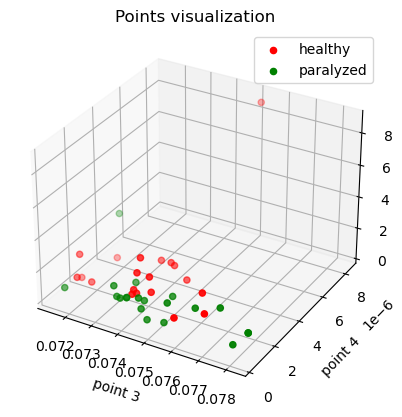

In [7]:
#%matplotlib widget
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.set_title("Points visualization")
ax.set_xlabel(f'point {points[0]}')
ax.set_ylabel(f'point {points[1]}')
ax.set_zlabel(f'point {points[2]}')
ax.scatter(dataset.query("status == 'Z' and point_index == @points[0]")['value'],dataset.query("status == 'Z' and point_index == @points[1]")['value'],dataset.query("status == 'Z' and point_index == @points[2]")['value'],color='red',label='healthy')
ax.scatter(dataset.query("status == 'S' and point_index == @points[0]")['value'],dataset.query("status == 'S' and point_index == @points[1]")['value'],dataset.query("status == 'S' and point_index == @points[2]")['value'],color='green',label='paralyzed')
ax.legend()

In [8]:
#make data ready for classifiers
y=np.array([])
for name in names:
    if name[0]=='Z':
        y=np.append(y,1)
    else:
        y=np.append(y,0)

In [9]:
x1 = pd.DataFrame({f'point {points[0]}':dataset.query("point_index == @points[0]")['value']},index=None).reset_index()
x2 = pd.DataFrame({f'point {points[1]}':dataset.query("point_index == @points[1]")['value']},index=None).reset_index()
x3 = pd.DataFrame({f'point {points[2]}':dataset.query("point_index == @points[2]")['value']},index=None).reset_index()

x=pd.DataFrame([x1[f'point {points[0]}'],x2[f'point {points[1]}'],x3[f'point {points[2]}']]).transpose()

In [10]:
x.head()

,point 3,point 4,point 5
0,0.074599,0.000003,0.000002
1,0.074479,0.000003,0.000002
2,0.075128,0.000003,0.000001
3,0.076295,0.000001,0.000002
4,0.074499,0.000001,0.000003


In [11]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes-do clanku vynechat
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [12]:
#make classificarion and plot ROC curves
val_ac=pd.DataFrame(index=models.keys())
val_pr=pd.DataFrame(index=models.keys())
val_re=pd.DataFrame(index=models.keys())
val_fs=pd.DataFrame(index=models.keys())

for i in range(10):
    accuracy, precision, recall, f1_measure = {}, {}, {}, {}
    X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2)
    con_mat=pd.DataFrame([])
    for key in models.keys():
        # Fit the classifier
        models[key].fit(X_train, y_train)

        # Make predictions
        predictions = models[key].predict(X_test)

        # Calculate metrics
        accuracy[key] = accuracy_score(predictions, y_test)
        precision[key] = precision_score(predictions, y_test)
        recall[key] = recall_score(predictions, y_test)
        f1_measure[key] = f1_score(predictions, y_test)
        con_mat[key]=predictions
        X=np.array(x)
    val_ac[i]=accuracy.values()
    val_pr[i] = precision.values()
    val_re[i] = recall.values()
    val_fs[i] = f1_measure.values()
################################################################################UP########################################################    

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined an

In [13]:
val_ac.transpose().describe()

,Logistic Regression,Support Vector Machines,Decision Trees,Random Forest,Naive Bayes,K-Nearest Neighbor
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.450000,0.412500,0.587500,0.637500,0.712500,0.550000
std,0.188193,0.144938,0.144938,0.160835,0.118585,0.120761
min,0.250000,0.250000,0.375000,0.375000,0.500000,0.375000
25%,0.375000,0.375000,0.500000,0.531250,0.750000,0.500000
50%,0.375000,0.375000,0.562500,0.625000,0.750000,0.562500
75%,0.562500,0.468750,0.625000,0.718750,0.750000,0.625000
max,0.750000,0.750000,0.875000,0.875000,0.875000,0.750000


In [14]:
val_pr.transpose().describe()

,Logistic Regression,Support Vector Machines,Decision Trees,Random Forest,Naive Bayes,K-Nearest Neighbor
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.575000,0.500000,0.750000,0.790000,0.638333,0.685000
std,0.441745,0.485913,0.252885,0.304716,0.298975,0.311948
min,0.000000,0.000000,0.333333,0.166667,0.200000,0.200000
25%,0.125000,0.000000,0.616667,0.666667,0.375000,0.425000
50%,0.625000,0.500000,0.750000,1.000000,0.633333,0.708333
75%,1.000000,1.000000,1.000000,1.000000,0.937500,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
val_re.transpose().describe()

,Logistic Regression,Support Vector Machines,Decision Trees,Random Forest,Naive Bayes,K-Nearest Neighbor
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.397500,0.262500,0.632381,0.687143,0.851667,0.593333
std,0.374806,0.259874,0.237518,0.250281,0.200993,0.186846
min,0.000000,0.000000,0.400000,0.400000,0.500000,0.333333
25%,0.062500,0.000000,0.428571,0.500000,0.687500,0.464286
50%,0.375000,0.312500,0.583333,0.619048,1.000000,0.600000
75%,0.543750,0.375000,0.750000,0.958333,1.000000,0.666667
max,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000


In [16]:
val_fs.transpose().describe()

,Logistic Regression,Support Vector Machines,Decision Trees,Random Forest,Naive Bayes,K-Nearest Neighbor
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.403636,0.311970,0.621212,0.649827,0.651667,0.560902
std,0.289956,0.289237,0.120497,0.178327,0.156633,0.132914
min,0.000000,0.000000,0.500000,0.285714,0.333333,0.333333
25%,0.100000,0.000000,0.551948,0.571429,0.541667,0.458333
50%,0.545455,0.366667,0.585714,0.666667,0.708333,0.571429
75%,0.636364,0.545455,0.650000,0.781818,0.750000,0.650000
max,0.666667,0.750000,0.857143,0.909091,0.800000,0.750000


In [17]:
for model in models.keys():
    print(f'Accuracy is for {model} '+str(val_ac.transpose()[model].mean().round(3)*100)+'+-'+str(val_ac.transpose()[model].std().round(3)*100))
    print(f'Precision is for {model} '+str(val_pr.transpose()[model].mean().round(3)*100)+'+-'+str(val_pr.transpose()[model].std().round(3)*100))
    print(f'Recall is for {model} '+str(val_re.transpose()[model].mean().round(3)*100)+'+-'+str(val_re.transpose()[model].std().round(3)*100))
    print(f'F1_score is for {model} '+str(val_fs.transpose()[model].mean().round(3)*100)+'+-'+str(val_fs.transpose()[model].std().round(3)*100))
    print('--------------------------------------------------------------')

Accuracy is for Logistic Regression 45.0+-18.8
Precision is for Logistic Regression 57.49999999999999+-44.2
Recall is for Logistic Regression 39.800000000000004+-37.5
F1_score is for Logistic Regression 40.400000000000006+-28.999999999999996
--------------------------------------------------------------
Accuracy is for Support Vector Machines 41.199999999999996+-14.499999999999998
Precision is for Support Vector Machines 50.0+-48.6
Recall is for Support Vector Machines 26.200000000000003+-26.0
F1_score is for Support Vector Machines 31.2+-28.9
--------------------------------------------------------------
Accuracy is for Decision Trees 58.8+-14.499999999999998
Precision is for Decision Trees 75.0+-25.3
Recall is for Decision Trees 63.2+-23.799999999999997
F1_score is for Decision Trees 62.1+-12.0
--------------------------------------------------------------
Accuracy is for Random Forest 63.800000000000004+-16.1
Precision is for Random Forest 79.0+-30.5
Recall is for Random Forest 68.7